In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("train.csv" )
test_set = pd.read_csv("test.csv" )

In [3]:
test_name = pd.read_csv("test.csv" )

In [4]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
columns_to_drop=['id','keyword','location']
dataset.drop(columns=columns_to_drop, axis=1,inplace=True)

In [6]:
dataset.head(10)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


In [7]:
sentences=dataset['text'].values

In [8]:
sentences

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [9]:
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(len(sentences)):
  review = re.sub('[^a-zA-Z\']', ' ', dataset['text'][i])
  review = review.lower()
  review = review.split()
  review = ' '.join(review)
  corpus.append(review)

In [10]:
len(corpus)

7613

In [11]:
labels = dataset['target'].values

# Bag of words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20000)
#test_size = 6000

#X_train = corpus[:test_size]
#X_test = corpus[test_size:]

#y_train = labels[:test_size]
#y_test = labels[test_size:]



#X_train = cv.fit_transform(X_train).toarray()
#X_test = cv.transform(X_test).toarray()

#X_train=np.array(X_train)
#X_test=np.array(X_test)


In [13]:
X =corpus
y= labels

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state =0)

In [15]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
X_train = cv.fit_transform(X_train).toarray()

In [17]:
X_test = cv.transform(X_test).toarray()

# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [0 0]
 [1 1]]


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[202 245]
 [ 64 251]]


0.594488188976378

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7808398950131233

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = cart.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[363  84]
 [125 190]]


0.7257217847769029

# Extra Trees

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
etc=ExtraTreesClassifier()
etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [31]:
y_pred = etc.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[414  33]
 [125 190]]


0.7926509186351706

# XGBoost

In [33]:
#pip install xgboost

In [34]:
from xgboost import XGBClassifier

In [35]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:19:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred = xgb.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[401  46]
 [120 195]]


0.7821522309711286

# Deep NLP

In [38]:
import tensorflow as tf

In [39]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 6000

In [40]:
dataset.shape

(7613, 2)

In [41]:
labels = dataset['target'].values

In [42]:
training_sentences = corpus[0:training_size]
testing_sentences = corpus[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [44]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(units=24, activation='relu'))
model.add(tf.keras.layers.Dense(units=24, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['Accuracy'])

In [46]:
num_epochs=100

In [47]:
print(training_labels)

[1 1 1 ... 0 0 0]


In [48]:
history = model.fit(training_padded, training_labels,validation_data=(testing_padded, testing_labels), epochs=num_epochs, batch_size=32)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 0.6832 - accuracy: 0.0000e+00 - val_loss: 0.6862 - val_accuracy: 0.0000e+00
Epoch 2/100
188/188 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.0000e+00 - val_loss: 0.6272 - val_accuracy: 0.0000e+00
Epoch 3/100
188/188 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.0000e+00 - val_loss: 0.4963 - val_accuracy: 0.0000e+00
Epoch 4/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.0000e+00 - val_loss: 0.5156 - val_accuracy: 0.0000e+00
Epoch 5/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.0000e+00 - val_loss: 0.4804 - val_accuracy: 0.0000e+00
Epoch 6/100
188/188 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.0000e+00 - val_loss: 0.4793 - val_accuracy: 0.0000e+00
Epoch 7/100
188/188 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 

Epoch 55/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.0000e+00 - val_loss: 1.6283 - val_accuracy: 0.0000e+00
Epoch 56/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.0000e+00 - val_loss: 1.7314 - val_accuracy: 0.0000e+00
Epoch 57/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.0000e+00 - val_loss: 1.6244 - val_accuracy: 0.0000e+00
Epoch 58/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 1.7338 - val_accuracy: 0.0000e+00
Epoch 59/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 1.6782 - val_accuracy: 0.0000e+00
Epoch 60/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.0000e+00 - val_loss: 1.6678 - val_accuracy: 0.0000e+00
Epoch 61/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0341 - acc

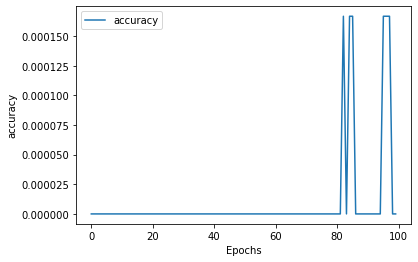

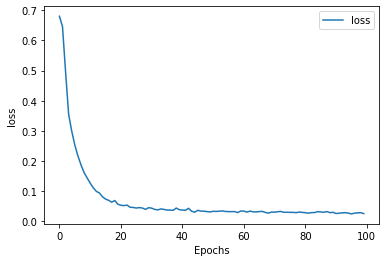

In [49]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [50]:
y_pred = model.predict(testing_padded)
y_pred = y_pred >0.5
print(np.concatenate((y_pred.reshape(len(y_pred),1), testing_labels.reshape(len(testing_labels),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(testing_labels, y_pred)
print(cm)
accuracy_score(testing_labels, y_pred)*100

[[578 281]
 [238 516]]


67.82393056416615